# ENVIRONMENT

In [1]:
import os
import acquire_aqi as acquire
import prepare_aqi as prepare
import pandas as pd
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm

from datetime import timedelta, datetime
from pylab import rcParams

# to explode the DataFrames and avoid truncation
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import tensorflow as tf

# univariate cnn lstm example
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

# ACQUIRE

In [2]:
df = acquire.read_data('cosa-air-quality.csv')

In [3]:
df.head().T

,0,1,2,3,4
Airmonitor Name,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk
Airmonitor Active,True,True,True,True,True
Airmonitor Address Zip,78205,78205,78205,78205,78205
Airmonitor Address State,TX,TX,TX,TX,TX
Airmonitor Address City,San Antonio,San Antonio,San Antonio,San Antonio,San Antonio
Airmonitor Address Street,141 E Houston St,141 E Houston St,141 E Houston St,141 E Houston St,141 E Houston St
AirmonitorReading TimeStamp,2/4/2019 8:02:53 PM,2/4/2019 8:12:53 PM,2/4/2019 8:22:53 PM,2/4/2019 8:32:53 PM,2/4/2019 8:42:54 PM
AirmonitorReading Temperature,26,26,26,26,26
AirmonitorReading Humidity,61,61,63,64,65
AirmonitorReading NO2,NaN,NaN,NaN,NaN,NaN


# PREPARE

In [4]:
df = prepare.lowercase_and_rename(df)

In [5]:
df.head().T

,0,1,2,3,4
monitor_name,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk
active,True,True,True,True,True
zip,78205,78205,78205,78205,78205
state,TX,TX,TX,TX,TX
city,San Antonio,San Antonio,San Antonio,San Antonio,San Antonio
street,141 E Houston St,141 E Houston St,141 E Houston St,141 E Houston St,141 E Houston St
timestamp,2/4/2019 8:02:53 PM,2/4/2019 8:12:53 PM,2/4/2019 8:22:53 PM,2/4/2019 8:32:53 PM,2/4/2019 8:42:54 PM
temperature,26,26,26,26,26
humidity,61,61,63,64,65
nitrogen_dioxide,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(38454, 24)

In [7]:
df.dtypes

monitor_name             object
active                     bool
zip                       int64
state                    object
city                     object
street                   object
timestamp                object
temperature               int64
humidity                  int64
nitrogen_dioxide        float64
nitrogen_dioxide_aqi    float64
sulfur_dioxide          float64
sulfur_dioxide_aqi      float64
trioxygen               float64
trioxygen_aqi           float64
carbon_monoxide         float64
carbon_monoxide_aqi       int64
volatile                float64
volatile_aqi            float64
particulate5              int64
particulate5_aqi          int64
particulate10             int64
particulate10_aqi         int64
final_aqi                 int64
dtype: object

In [8]:
prepare.missing_values_col(df)

/usr/local/anaconda3/envs/py36keras/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
monitor_name,0,0.000000,0,0.0,0,0.0
active,0,0.000000,0,0.0,0,0.0
zip,0,0.000000,0,0.0,0,0.0
state,0,0.000000,0,0.0,0,0.0
city,0,0.000000,0,0.0,0,0.0
street,0,0.000000,0,0.0,0,0.0
timestamp,0,0.000000,0,0.0,0,0.0
temperature,0,0.000000,0,0.0,0,0.0
humidity,0,0.000000,0,0.0,0,0.0
nitrogen_dioxide,38454,100.000000,0,0.0,0,0.0


In [9]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [10]:
df1 = prepare.ready_df1(df)

In [11]:
df1.head().T

,0,1,2,3,4
monitor_name,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk
active,True,True,True,True,True
zip,78205,78205,78205,78205,78205
state,TX,TX,TX,TX,TX
city,San Antonio,San Antonio,San Antonio,San Antonio,San Antonio
street,141 E Houston St,141 E Houston St,141 E Houston St,141 E Houston St,141 E Houston St
timestamp,2019-02-04 20:02:53,2019-02-04 20:12:53,2019-02-04 20:22:53,2019-02-04 20:32:53,2019-02-04 20:42:54
humidity,61,61,63,64,65
carbon_monoxide,1642,1595,1329,1670,1778
carbon_monoxide_aqi,18,18,17,17,18


In [12]:
df1.dtypes

monitor_name                   object
active                           bool
zip                             int64
state                          object
city                           object
street                         object
timestamp              datetime64[ns]
humidity                        int64
carbon_monoxide                 int64
carbon_monoxide_aqi             int64
particulate5                    int64
particulate5_aqi                int64
particulate10                   int64
particulate10_aqi               int64
final_aqi                       int64
temperature                   float64
dtype: object

In [13]:
df1.sort_values('timestamp').reset_index().drop(columns=('index')).head().T

,0,1,2,3,4
monitor_name,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA20 Woodlawn Lake Park
active,True,True,True,True,True
zip,78205,78205,78205,78205,78210
state,TX,TX,TX,TX,TX
city,San Antonio,San Antonio,San Antonio,San Antonio,San Antonio
street,141 E Houston St,141 E Houston St,141 E Houston St,141 E Houston St,189 Josephine Tobin
timestamp,2019-02-04 20:02:53,2019-02-04 20:12:53,2019-02-04 20:22:53,2019-02-04 20:32:53,2019-02-04 20:32:53
humidity,61,61,63,64,48
carbon_monoxide,1642,1595,1329,1670,0
carbon_monoxide_aqi,18,18,17,17,0


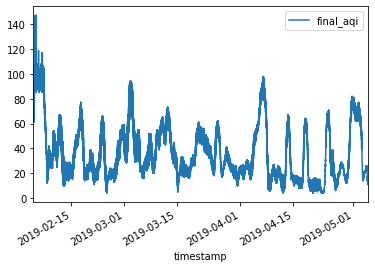

In [14]:
by_date = df1.groupby(['timestamp'])['final_aqi'].mean().reset_index()
by_date.plot(x='timestamp', y='final_aqi');

In [15]:
df1.timestamp.nunique()

26041

In [16]:
timedelta(df1.timestamp.nunique()) == (df1.timestamp.max() - df1.timestamp.min()) + timedelta(days=1)

False

In [17]:
# Observations per store
print(df1.monitor_name.value_counts().unique())

[12821 12819 12814]


In [18]:
df1

,monitor_name,active,zip,state,city,street,timestamp,humidity,carbon_monoxide,carbon_monoxide_aqi,particulate5,particulate5_aqi,particulate10,particulate10_aqi,final_aqi,temperature
0,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,2019-02-04 20:02:53,61,1642,18,35,99,38,35,99,78.8
1,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,2019-02-04 20:12:53,61,1595,18,28,91,31,31,91,78.8
2,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,2019-02-04 20:22:53,63,1329,17,26,87,27,29,87,78.8
3,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,2019-02-04 20:32:53,64,1670,17,32,89,33,29,89,78.8
4,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,2019-02-04 20:42:54,65,1778,18,30,89,30,29,89,78.8
5,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,2019-02-04 20:52:54,60,2504,19,31,89,33,29,89,78.8
6,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,2019-02-04 21:02:54,60,1881,20,29,88,30,29,88,78.8
7,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,2019-02-04 21:12:53,63,1612,19,28,88,30,29,88,78.8
8,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,2019-02-04 21:22:54,61,1597,19,28,87,28,28,87,80.6
9,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,2019-02-04 21:32:54,60,1182,19,28,87,29,28,87,80.6


In [19]:
df1 = df1.sort_values('timestamp')
df1 = df1.set_index('timestamp')

In [20]:
df1.dtypes

monitor_name            object
active                    bool
zip                      int64
state                   object
city                    object
street                  object
humidity                 int64
carbon_monoxide          int64
carbon_monoxide_aqi      int64
particulate5             int64
particulate5_aqi         int64
particulate10            int64
particulate10_aqi        int64
final_aqi                int64
temperature            float64
dtype: object

In [21]:
df1.head().T

timestamp,2019-02-04 20:02:53,2019-02-04 20:12:53,2019-02-04 20:22:53,2019-02-04 20:32:53,2019-02-04 20:32:53
monitor_name,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA01 Houston Riverwalk,CSA20 Woodlawn Lake Park
active,True,True,True,True,True
zip,78205,78205,78205,78205,78210
state,TX,TX,TX,TX,TX
city,San Antonio,San Antonio,San Antonio,San Antonio,San Antonio
street,141 E Houston St,141 E Houston St,141 E Houston St,141 E Houston St,189 Josephine Tobin
humidity,61,61,63,64,48
carbon_monoxide,1642,1595,1329,1670,0
carbon_monoxide_aqi,18,18,17,17,0
particulate5,35,28,26,32,23


In [22]:
df1.tail().T

timestamp,2019-05-04 23:46:21,2019-05-04 23:46:21,2019-05-04 23:56:21,2019-05-04 23:56:21,2019-05-04 23:56:21
monitor_name,CSA02 Houston & St Marys,CSA20 Woodlawn Lake Park,CSA02 Houston & St Marys,CSA01 Houston Riverwalk,CSA20 Woodlawn Lake Park
active,True,True,True,True,True
zip,78205,78210,78205,78205,78210
state,TX,TX,TX,TX,TX
city,San Antonio,San Antonio,San Antonio,San Antonio,San Antonio
street,177 E Houston St,189 Josephine Tobin,177 E Houston St,141 E Houston St,189 Josephine Tobin
humidity,33,31,34,33,32
carbon_monoxide,0,0,0,0,0
carbon_monoxide_aqi,8,15,8,18,15
particulate5,1,2,10,3,1


In [23]:
aqi = df1.copy()

In [24]:
aqi.head()

,monitor_name,active,zip,state,city,street,humidity,carbon_monoxide,carbon_monoxide_aqi,particulate5,particulate5_aqi,particulate10,particulate10_aqi,final_aqi,temperature
timestamp,,,,,,,,,,,,,,,
2019-02-04 20:02:53,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,61,1642,18,35,99,38,35,99,78.8
2019-02-04 20:12:53,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,61,1595,18,28,91,31,31,91,78.8
2019-02-04 20:22:53,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,63,1329,17,26,87,27,29,87,78.8
2019-02-04 20:32:53,CSA01 Houston Riverwalk,True,78205,TX,San Antonio,141 E Houston St,64,1670,17,32,89,33,29,89,78.8
2019-02-04 20:32:53,CSA20 Woodlawn Lake Park,True,78210,TX,San Antonio,189 Josephine Tobin,48,0,0,23,73,25,23,73,80.6


In [25]:
aqi = (aqi.final_aqi).tolist()

# CNN LSTM

In [26]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [27]:
# define input sequence
raw_seq = aqi

In [28]:
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)

In [30]:
xxx = aqi[-4:]

In [31]:
xxx

[15, 8, 18, 15]

In [32]:
# demonstrate prediction
x_input = array(xxx)
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[14.113149]]


In [33]:
aqi.append(yhat[0,0])

In [38]:
aqi[-5:]

[15, 8, 18, 15, 14.113149]

In [42]:
aqi.tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [43]:
new_aqi = pd.Series(aqi)

In [46]:
new_aqi.to_frame()

,0
0,99.000000
1,91.000000
2,87.000000
3,89.000000
4,73.000000
5,71.000000
6,89.000000
7,69.000000
8,76.000000
9,89.000000


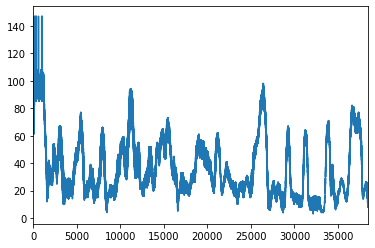

In [47]:
new_aqi.plot()